# Proyek Machine Learning - Prediction of Hospital Readmission



Nama: Farrel Jonathan Vickeldo

Email: farrel.jonathan.fj@gmail.com

ID Dicoding: falthackel

## Business Understanding

### Problem Statement


1. Tingginya angka hospital readmission pada pasien diabetes mencerminkan permasalahan kualitas perawatan rawat inap, khususnya di luar ICU.
2. Implementasi protokol berbasis data, seperti pengukuran HbA1c, memiliki potensi untuk mengurangi angka readmission dan meningkatkan efisiensi biaya kesehatan.
3. Kurangnya evaluasi nasional mengenai perawatan diabetes di rumah sakit menjadi hambatan dalam menciptakan panduan dan baseline yang relevan untuk perubahan sistem perawatan.
4. Tantangan teknis dalam analisis data klinis yang kompleks dan heterogen perlu diatasi untuk menggali wawasan baru yang dapat meningkatkan keselamatan pasien dan efisiensi sistem kesehatan.

### Goals

1.   Faktor-faktor apa yang menjadi prediktor terkuat untuk rawat inap ulang pasien diabetes?
2.   Seberapa baik kita dapat memprediksi rawat inap ulang pasien diabetes dalam kumpulan data ini dengan fitur terbatas?
3.   Bagaimana menentukan penggunaan model terhadap use case tertentu berdasarkan kebutuhan rumah sakit?


## Data Understanding

### Variabel-variabel dalam dataset

1. `encounter_id` id unik untuk setiap pertemuan
2. `patient_nbr` id unik untuk setiap pasien
3. `race` nilai: Caucasian, Asian, African American, Hispanic, and lainnya
4. `gender` nilai: male, female, dan unknown/invalid
5. `age` dikelompokkan dalam interval 10 tahun: [0, 10), [10, 20),..., [90, 100)
6. `weight` Weight dalam pon.
7. `admission_type_id` id integer yang sesuai dengan 9 nilai berbeda, misalnya, emergency, urgent, elective, newborn, dan not available.
8. `discharge_disposition_id` id identifier yang sesuai dengan 29 nilai yang berbeda, seperti discharged to home, expired, and not available.
9. `admission_source_id` id identifier yang sesuai dengan 21 nilai yang berbeda, seperti physician referral, emergency room, and transfer from a hospital.
10. `time_in_hospital` jumlah hari antara penerimaan dan pemulangan.
11. `payer_code` id integer yang sesuai dengan 23 nilai yang berbeda, seperti Blue Cross/Blue Shield, Medicare, and self-pay Medical
12. `medical_specialty` Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon.
13. `num_lab_procedures` jumlah tes laboratorium yang dilakukan selama pertemuan.
14. `num_procedures` jumlah prosedur (selain tes laboratorium) yang dilakukan selama pertemuan.
15. `num_medications` jumlah nama generik berbeda yang diberikan selama pertemuan.
16. `number_outpatient` jumlah kunjungan pasien rawat jalan pada tahun sebelum pertemuan.
17. `number_emergency` jumlah kunjungan gawat darurat pasien pada tahun sebelum pertemuan.
18. `number_inpatient` jumlah kunjungan pasien rawat inap pada tahun sebelum pertemuan.
19. `diag_1` diagnosis utama (dikodekan sebagai tiga digit pertama ICD9); 848 nilai berbeda.
20. `diag_2` diagnosis sekunder (dikodekan sebagai tiga digit pertama ICD9); 923 nilai berbeda.
21. `diag_3` diagnosis sekunder tambahan (dikodekan sebagai tiga digit pertama ICD9); 954 nilai berbeda.
22. `number_diagnoses` jumlah diagnosis yang dimasukkan ke dalam sistem.
23. `max_glu_serum` menunjukkan kisaran hasil atau jika tes tidak dilakukan. Nilai: >200, >300, normal, dan tidak ada jika tidak diukur.
24. `A1Cresult` menunjukkan rentang hasil atau jika tes tidak dilakukan. Nilai: >8 jika hasilnya lebih besar dari 8%, >7 jika hasilnya lebih besar dari 7% tetapi kurang dari 8%, normal jika hasilnya kurang dari 7%, dan tidak ada jika tidak diukur.
25. `change` Menunjukkan jika ada perubahan pada obat diabetes (baik dosis atau nama generik). Nilai: change dan no change.
26. `diabetesMed` menunjukkan apakah ada obat diabetes yang diresepkan. Nilai: yes dan no.
27. 24 fitur untuk obat-obatan Untuk nama generik: `metformin`, `repaglinide`, `nateglinide`, `chlorpropamide`, `glimepiride`, `acetohexamide`, `glipizide`, `glyburide`, `tolbutamide`, `pioglitazone`, `rosiglitazone`, `acarbose`, `miglitol`, `troglitazone`, `tolazamide`, `examide`, `sitagliptin`, `insulin`, `glyburide-metformin`, `glipizide-metformin`, `glimepiride- pioglitazone`, `metformin-rosiglitazone`, dan `metformin-pioglitazone`. Fitur ini menunjukkan apakah obat tersebut diresepkan atau ada perubahan dosis. Nilai: “naik” jika dosis ditingkatkan selama pertemuan, “turun” jika dosis dikurangi, “stabil” jika dosis tidak berubah, dan “tidak” jika obat tidak diresepkan.
28. `readmitted` jumlah hari hingga pasien rawat inap kembali. Nilai: <30 jika pasien dirawat kembali dalam waktu kurang dari 30 hari, >30 jika pasien dirawat kembali dalam waktu lebih dari 30 hari, dan Tidak untuk tidak ada catatan pasien yang dirawat kembali.

## Step 1: Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from imblearn.over_sampling import SMOTE
from collections import Counter

## Step 2: Data Preprocessing

### Load Data

In [2]:
file_path = "/content/diabetic_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


Jika dilihat diatas, terdapat beberapa data yang kosong dan direpresentasikan dalam `?` dan NaN. Nilai yang kosong ini akan diproses lebih lanjut.

In [4]:
df.shape

(101766, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
for col in df.columns:
    if df[col].isin(['?']).any():  # Check jika ada '?' dalam setiap fitur
        print(f"Nilai '?' dalam kolom {col} adalah {df[col].isin(['?']).sum()}")

Nilai '?' dalam kolom race adalah 2273
Nilai '?' dalam kolom weight adalah 98569
Nilai '?' dalam kolom payer_code adalah 40256
Nilai '?' dalam kolom medical_specialty adalah 49949
Nilai '?' dalam kolom diag_1 adalah 21
Nilai '?' dalam kolom diag_2 adalah 358
Nilai '?' dalam kolom diag_3 adalah 1423


Dari kode diatas, tercatat ada 7 fitur yang memiliki nilai kosong '?' dan ketujuh fitur tersebut bertipe data object. Akan tetapi, fitur `max_glu_serum` dan `A1Cresult` memiliki nilai NULL yang tidak diisi dengan '?'.

In [7]:
for col in df.columns:
    if df[col].isna().any():  # Check jika ada 'NaN' dalam kolom
        print(f"Nilai 'NaN' dalam kolom {col} adalah {df[col].isna().sum()}")

Nilai 'NaN' dalam kolom max_glu_serum adalah 96420
Nilai 'NaN' dalam kolom A1Cresult adalah 84748


Kode teratas telah mencatat semua nilai kosong yang dimiliki dalam dataset. Akan tetapi, jika dibaca deskripsi variabel dataset yang digunakan, tidak ada missing value pada kolom `max_glu_serum` dan `AICresult`. Artinya, nilai NaN adalah sebuah kondisi yang disengaja. Oleh karena itu, data ini tidak akan diproses dengan penghilangan.

In [8]:
for col in df.columns[24:47]:
    print(f"Nilai unik dalam kolom {col} adalah {df[col].unique()}")

Nilai unik dalam kolom metformin adalah ['No' 'Steady' 'Up' 'Down']
Nilai unik dalam kolom repaglinide adalah ['No' 'Up' 'Steady' 'Down']
Nilai unik dalam kolom nateglinide adalah ['No' 'Steady' 'Down' 'Up']
Nilai unik dalam kolom chlorpropamide adalah ['No' 'Steady' 'Down' 'Up']
Nilai unik dalam kolom glimepiride adalah ['No' 'Steady' 'Down' 'Up']
Nilai unik dalam kolom acetohexamide adalah ['No' 'Steady']
Nilai unik dalam kolom glipizide adalah ['No' 'Steady' 'Up' 'Down']
Nilai unik dalam kolom glyburide adalah ['No' 'Steady' 'Up' 'Down']
Nilai unik dalam kolom tolbutamide adalah ['No' 'Steady']
Nilai unik dalam kolom pioglitazone adalah ['No' 'Steady' 'Up' 'Down']
Nilai unik dalam kolom rosiglitazone adalah ['No' 'Steady' 'Up' 'Down']
Nilai unik dalam kolom acarbose adalah ['No' 'Steady' 'Up' 'Down']
Nilai unik dalam kolom miglitol adalah ['No' 'Steady' 'Down' 'Up']
Nilai unik dalam kolom troglitazone adalah ['No' 'Steady']
Nilai unik dalam kolom tolazamide adalah ['No' 'Steady' 'Up

Meskipun tidak ada nilai NULL, kolom `examide` dan `citoglipton` tidak menunjukkan adanya variasi nilai. Fitur ini tidak akan dapat memberikan informasi yang berarti untuk diproses lebih lanjut. Oleh karena itu, kolom ini akan dihilangkan.

In [9]:
print(f"Nilai unik dalam kolom gender adalah {df['gender'].unique()}")
print(f"Nilai 'Unknown/Invalid' dalam kolom gender adalah {df['gender'].isin(['Unknown/Invalid']).sum()}")

Nilai unik dalam kolom gender adalah ['Female' 'Male' 'Unknown/Invalid']
Nilai 'Unknown/Invalid' dalam kolom gender adalah 3


In [10]:
print(f"Nilai unik dalam kolom race adalah {df['race'].unique()}")
# print(f"Nilai 'Unknown/Invalid' dalam kolom gender adalah {df['gender'].isin(['Unknown/Invalid']).sum()}")

Nilai unik dalam kolom race adalah ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


### Menangani Nilai yang Hilang

Ada beberapa fitur yang akan dihilangkan, yaitu
1. Variabel `weight` berisi sekitar 98% dari nilai yang hilang.
2. Variabel `payer_code` berisi sekitar 40% nilai yang hilang.
3. Variabel `medical_speciality` berisi sekitar 50% nilai yang hilang.
4. Variabel `examide` dan `citoglipton` karena hanya berisikan nilai No.

Ada beberapa baris yang akan dihilangkan untuk mengatasi nilai kosong pada fitur: `race`, `diag_1`, `diag_2`, `diag_3`, dan `gender`.

In [11]:
# Drop kolom dengan jumlah missing value yang besar
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [12]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))

drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))

new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [13]:
# Drop kolom `citoglipton` dan `examide`
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [14]:
df.head(5).T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,[10-20),[20-30),[30-40),[40-50),[50-60)
admission_type_id,1,1,1,1,2
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,2
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [15]:
df.shape

(96446, 45)

## Step 3: Data Processing

### Encoding

Fitur `age` memiliki nilai object yang menglasfikasikan umur pasien menjadi kelompok umur dengan rentang 10 tahun. Oleh karena itu, kita akan mengubah setiap rentang menjadi nilai tengah kelompok umur tersebut, mulai dari [0-10) menjadi 5, [10-20) menjadi 10, dst.

In [16]:
# Mengubah kelompok umur menjadi nilai 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (i+1)*10 - 5)
df['age'].value_counts()

<ipython-input-16-faa26dc2802f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (i+1)*10 - 5)


,count
age,
75,24815
65,21521
55,16546
85,16223
45,9208
35,3538
95,2594
25,1471
15,466


Jumlah perubahan pengobatan: Kumpulan data berisi 23 fitur untuk 23 obat (atau kombinasi) yang menunjukkan untuk masing-masing obat, apakah ada perubahan pengobatan yang dilakukan atau tidak selama pasien dirawat di rumah sakit saat ini. Penelitian sebelumnya menunjukkan bahwa perubahan pengobatan untuk penderita diabetes saat masuk rumah sakit berhubungan dengan tingkat readmisi yang lebih rendah. Tujuannya adalah untuk menyederhanakan model dan mungkin menemukan hubungan dengan jumlah perubahan terlepas dari obat mana yang diubah.

In [17]:
# Create a list of drug feature column names
drug_features = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Create a new column 'numchange' to store the number of drug changes per patient
df['numchange'] = df[drug_features].applymap(lambda x: 0 if x in ['No', 'Steady'] else 1).sum(axis=1)

# Check the distribution of 'numchange' values
df['numchange'].value_counts()

<ipython-input-17-9eca06985c7b>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['numchange'] = df[drug_features].applymap(lambda x: 0 if x in ['No', 'Steady'] else 1).sum(axis=1)


,count
numchange,
0,70142
1,24922
2,1271
3,106
4,5


Beberapa fitur menggunakan tipe data object, sehingga akan dilakukan encoding.
1. `change`
2. `gender`
3. `diabetesMed`
4. `readmitted`
5. `A1Cresult`
6. `max_glu_serum`

Fitur baru yang dibuat dari encoding fitur lainnya adalah
1. `group_diag_1` dari `diag_1`
2. `group_diag_2` dari `diag_2`
3. `group_diag_3` dari `diag_3`


In [18]:
df['race'] = df['race'].replace({'Caucasian': 1, 'AfricanAmerican': 2, 'Asian': 3, 'Hispanic': 4, 'Other': 5})
df['change'] = df['change'].replace('Ch', 1).replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1).replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1).replace('No', 0)
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

for col in drug_features:
    df[col] = df[col].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

<ipython-input-18-7caf6b9bc53e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['race'] = df['race'].replace({'Caucasian': 1, 'AfricanAmerican': 2, 'Asian': 3, 'Hispanic': 4, 'Other': 5})
<ipython-input-18-7caf6b9bc53e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('Ch', 1).replace('No', 0)
<ipython-input-18-7caf6b9bc53e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obje

In [19]:
# Replace A1Cresult and max_glu_serum values
df['A1Cresult'] = df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0})
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0})

# Replace real NaN values with -99
df['A1Cresult'] = df['A1Cresult'].fillna(-99)
df['max_glu_serum'] = df['max_glu_serum'].fillna(-99)

print(df[['A1Cresult', 'max_glu_serum']].isnull().sum())

A1Cresult        0
max_glu_serum    0
dtype: int64


<ipython-input-19-996b04e29b73>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0})
<ipython-input-19-996b04e29b73>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0})


Mengategorikan kode kode pada `diag_1`, `diag_2`, dan `diag_3` sesuai dengan tabel jurnal. Kemudian, akan diubah menjadi representasi angka untuk memudahkan model.

In [20]:
# Define a function to map ICD9 codes to primary diagnosis groups
def map_primary_diagnosis(value):
    if value.startswith(('V', 'E')):  # External causes
        return 'Other'
    if value == '?':  # Missing/invalid values
        return 'Other'

    value = float(value)

    if (390 <= value < 460) or (np.floor(value) == 785):
        return 'Circulatory'
    elif (460 <= value < 520) or (np.floor(value) == 786):
        return 'Respiratory'
    elif (520 <= value < 580) or (np.floor(value) == 787):
        return 'Digestive'
    elif np.floor(value) == 250:
        return 'Diabetes'
    elif 800 <= value < 1000:
        return 'Injury'
    elif 710 <= value < 740:
        return 'Musculoskeletal'
    elif (580 <= value < 630) or (np.floor(value) == 788):
        return 'Genitourinary'
    elif 140 <= value < 240:
        return 'Neoplasms'
    elif 780 <= value < 800:
        return 'Other symptoms and ill-defined conditions'
    elif (240 <= value < 280) and np.floor(value) != 250:
        return 'Endocrine, nutritional, metabolic'
    elif (680 <= value < 710) or (np.floor(value) == 782):
        return 'Skin and subcutaneous'
    elif 1 <= value < 140:
        return 'Infectious and parasitic diseases'
    elif 290 <= value < 320:
        return 'Mental disorders'
    elif 280 <= value < 290:
        return 'Blood and blood-forming organs'
    elif 320 <= value < 360:
        return 'Nervous system'
    elif 630 <= value < 680:
        return 'Pregnancy and childbirth'
    elif 360 <= value < 390:
        return 'Sense organs'
    elif 740 <= value < 760:
        return 'Congenital anomalies'
    else:
        return 'Other'

# Apply the mapping function to diagnostic columns
for diag_col in ['diag_1', 'diag_2', 'diag_3']:
    df[f'group_{diag_col}'] = df[diag_col].apply(map_primary_diagnosis)

# Example usage
print(df[['diag_1', 'group_diag_1']].head())
print(df[['diag_2', 'group_diag_2']].head())
print(df[['diag_3', 'group_diag_3']].head())

  diag_1                       group_diag_1
1    276  Endocrine, nutritional, metabolic
2    648           Pregnancy and childbirth
3      8  Infectious and parasitic diseases
4    197                          Neoplasms
5    414                        Circulatory
   diag_2 group_diag_2
1  250.01     Diabetes
2     250     Diabetes
3  250.43     Diabetes
4     157    Neoplasms
5     411  Circulatory
  diag_3                       group_diag_3
1    255  Endocrine, nutritional, metabolic
2    V27                              Other
3    403                        Circulatory
4    250                           Diabetes
5    250                           Diabetes


In [21]:
# Combine diagnosis group columns into one (optional step for simplicity)
all_diag = pd.concat([df['group_diag_1'], df['group_diag_2'], df['group_diag_3']])

# Apply label encoding
encoder = LabelEncoder()
encoder.fit(all_diag.dropna())  # Drop NaN values before fitting

# Transform each group column
for col in ['group_diag_1', 'group_diag_2', 'group_diag_3']:
    df[f'{col}_encoded'] = encoder.transform(df[col].fillna('Other'))

# Example output
print(df[['group_diag_1', 'group_diag_1_encoded']].head())

                        group_diag_1  group_diag_1_encoded
1  Endocrine, nutritional, metabolic                     5
2           Pregnancy and childbirth                    15
3  Infectious and parasitic diseases                     7
4                          Neoplasms                    11
5                        Circulatory                     1


Jika ditinjau dari id pasien pada `patient_nbr`, terdapat beberapa id yang melakukan readmisi lebih dari sekali. Untuk mengatasi bias output, row yang digunakan hanya readmisi pertama dari setiap pasien. Hasilnya, berkurang sekitar lebih dari 30.000 data

In [22]:
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df.shape

(67580, 52)

### Feature Engineering

Menggabungkan `change` dan `diabetesMed` menjadi satu fitur untuk menunjukkan apakah ada perubahan pengobatan yang dilakukan untuk pasien yang menerima pengobatan diabetes.

In [23]:
# Create interaction feature: change_diabetesMed
df['change_diabetesMed'] = ((df['change'] == 1) & (df['diabetesMed'] == 1)).astype(int)

# Example explanation:
# - If `change` == 1 and `diabetesMed` == 1, set value to 1; otherwise, 0.
# - This indicates whether the patient receiving diabetes medication had any changes.

<ipython-input-23-4af959c0458e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_diabetesMed'] = ((df['change'] == 1) & (df['diabetesMed'] == 1)).astype(int)


Menganalisis pola pemanfaatan layanan kesehatan pasien dengan membuat rasio atau tanda yang merangkum interaksi mereka dengan fasilitas layanan kesehatan.

Rasio seperti pasien gawat darurat dengan pasien rawat inap dan pasien rawat jalan dengan pasien rawat inap memberikan wawasan berharga tentang pola pemanfaatan layanan kesehatan pasien. Metrik ini mengungkap tren dalam cara pasien berinteraksi dengan berbagai jenis layanan kesehatan dan dapat menginformasikan alokasi sumber daya, manajemen perawatan, dan pemodelan prediktif.



In [24]:
# Create ratios
df['emergency_to_inpatient'] = (df['number_emergency'] / (df['number_inpatient'] + 1)).fillna(0)
df['outpatient_to_inpatient'] = (df['number_outpatient'] / (df['number_inpatient'] + 1)).fillna(0)

# Create cumulative visit count
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

# Flag high-utilization patterns
df['high_utilization'] = (df['total_visits'] > 10).astype(int)

<ipython-input-24-13e19c02fa8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emergency_to_inpatient'] = (df['number_emergency'] / (df['number_inpatient'] + 1)).fillna(0)
<ipython-input-24-13e19c02fa8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outpatient_to_inpatient'] = (df['number_outpatient'] / (df['number_inpatient'] + 1)).fillna(0)
<ipython-input-24-13e19c02fa8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [25]:
# List of columns to drop
columns_to_drop = ['diag_1', 'diag_2', 'diag_3', 'group_diag_1', 'group_diag_2', 'group_diag_3']

# Create df2 by dropping the specified columns
clean_df = df.drop(columns=columns_to_drop)

In [26]:
clean_df.head(5).T

,1,2,3,4,5
encounter_id,149190.0,64410.0,500364.0,16680.0,35754.0
patient_nbr,55629189.0,86047875.0,82442376.0,42519267.0,82637451.0
race,1.0,2.0,1.0,1.0,1.0
gender,0.0,0.0,1.0,1.0,1.0
age,15.0,25.0,35.0,45.0,55.0
admission_type_id,1.0,1.0,1.0,1.0,2.0
discharge_disposition_id,1.0,1.0,1.0,1.0,1.0
admission_source_id,7.0,7.0,7.0,7.0,2.0
time_in_hospital,3.0,2.0,2.0,1.0,3.0
num_lab_procedures,59.0,11.0,44.0,51.0,31.0


In [27]:
clean_df.shape

(67580, 51)

Setelah beberapa row dihilangkan dan manipulasi fitur, sekarang fitur bertambah menjadi 57 dengan catatan sudah menghapus beberapa fitur yang tidak diperlukan dan menambah fitur dari hasil feature engineering.

## Step 4: EDA

**Distribusi Readmisi**

Jumlah pasien yang dirawat kembali jauh lebih sedikit dibandingkan dengan pasien yang tidak dirawat kembali.

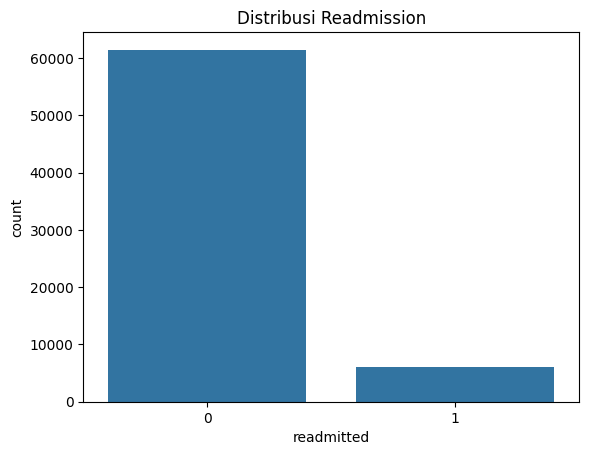

In [28]:
# Distribution of Readmission
sns.countplot(x='readmitted', data=clean_df).set_title('Distribusi Readmission')
plt.show()

Kita buat dataframe baru hanya untuk meninjau korelasi agar setiap parameter merupakan parameter angka. Korelasi yang ditinjau adalah korelasi readmission dan setiap parameter lainnya.

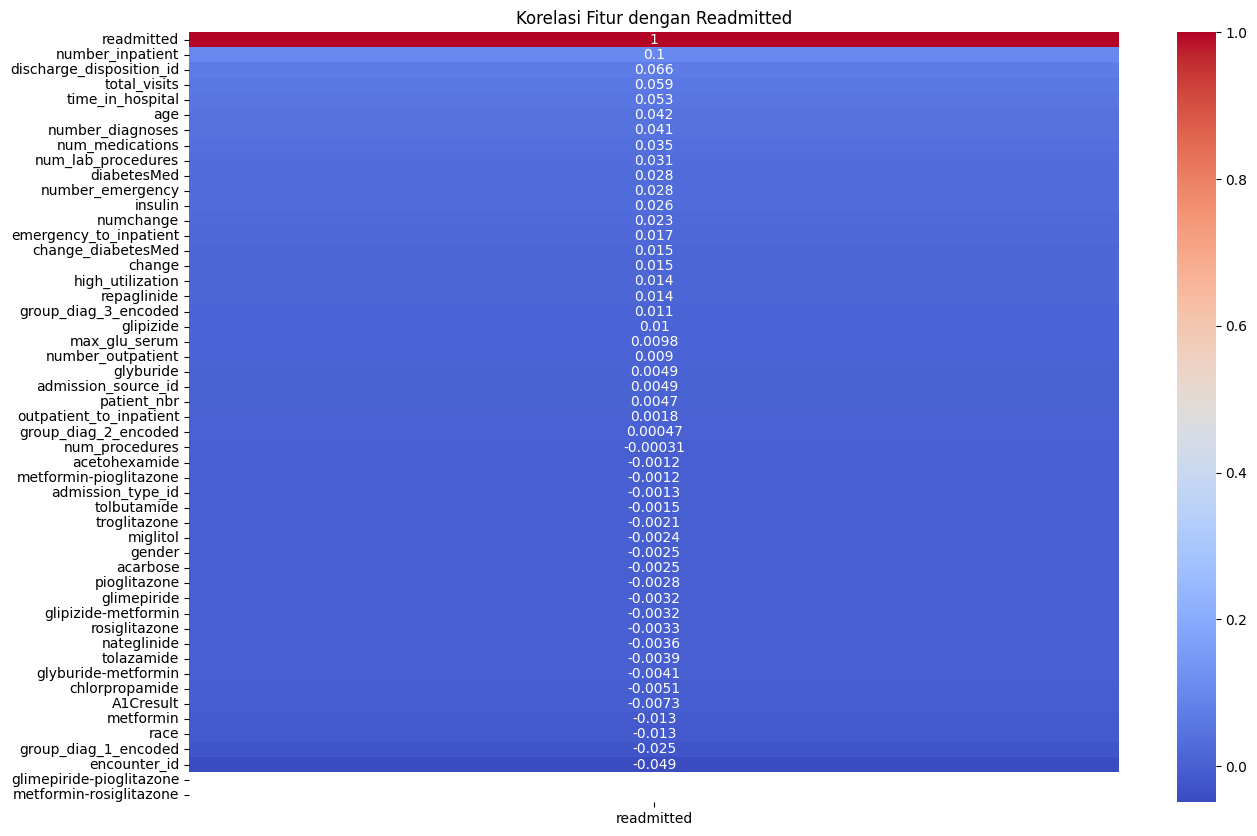

In [29]:
corr = clean_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr[['readmitted']].sort_values(by='readmitted', ascending=False), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur dengan Readmitted")
plt.show()

**Gender vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Gender')

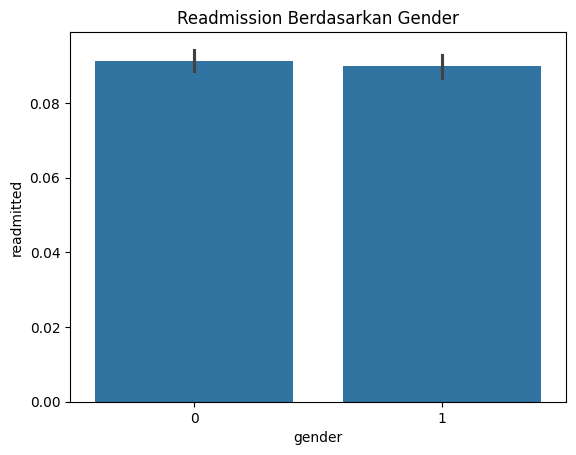

In [30]:
sns.barplot(x='gender', y='readmitted', data=clean_df)
plt.title("Readmission Berdasarkan Gender")

**Waktu di Rumah Sakit vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Waktu di Rumah Sakit')

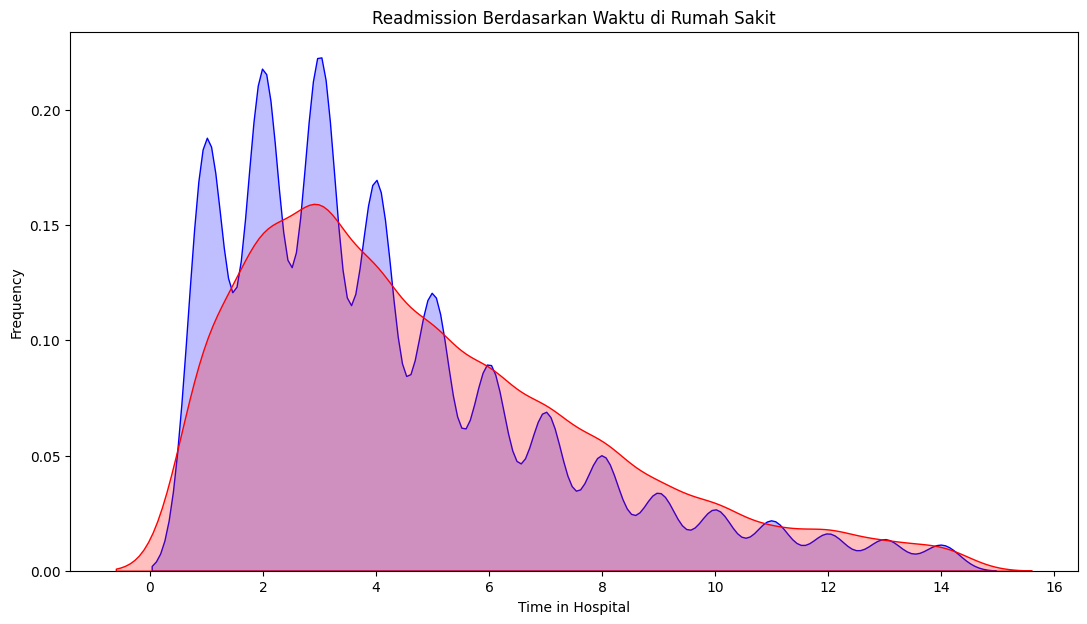

In [31]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(clean_df.loc[(clean_df['readmitted'] == 0),'time_in_hospital'] , color='b',fill=True,label='Not Readmitted')
ax=sns.kdeplot(clean_df.loc[(clean_df['readmitted'] == 1),'time_in_hospital'] , color='r',fill=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Readmission Berdasarkan Waktu di Rumah Sakit')

Text(0.5, 1.0, 'Distribusi Time in Hospital Berdasarkan Readmission')

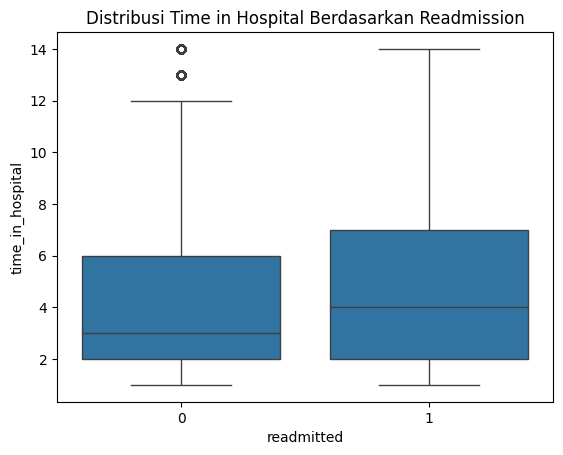

In [32]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=clean_df)
plt.title("Distribusi Time in Hospital Berdasarkan Readmission")

**Usia vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Usia')

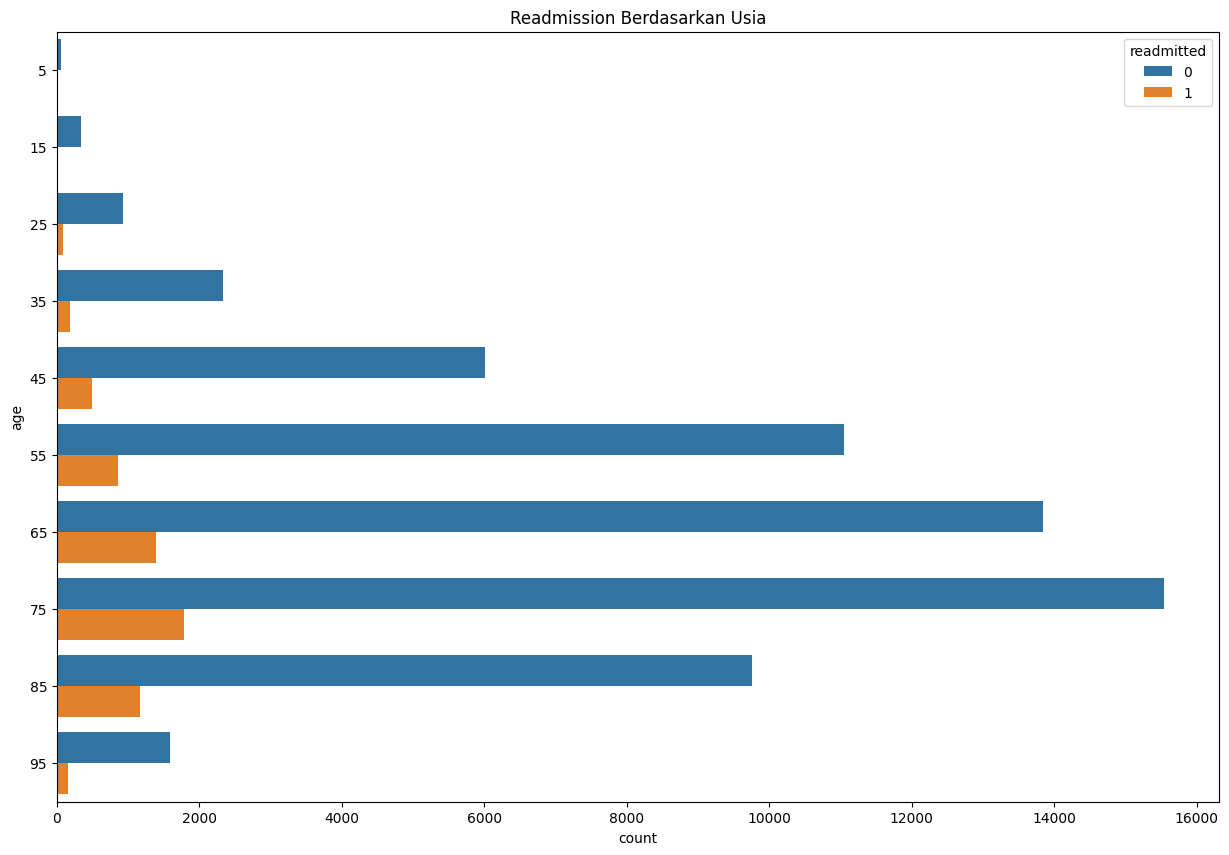

In [33]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= clean_df['age'], hue = clean_df['readmitted']).set_title('Readmission Berdasarkan Usia')

**Etnis vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Etnis')

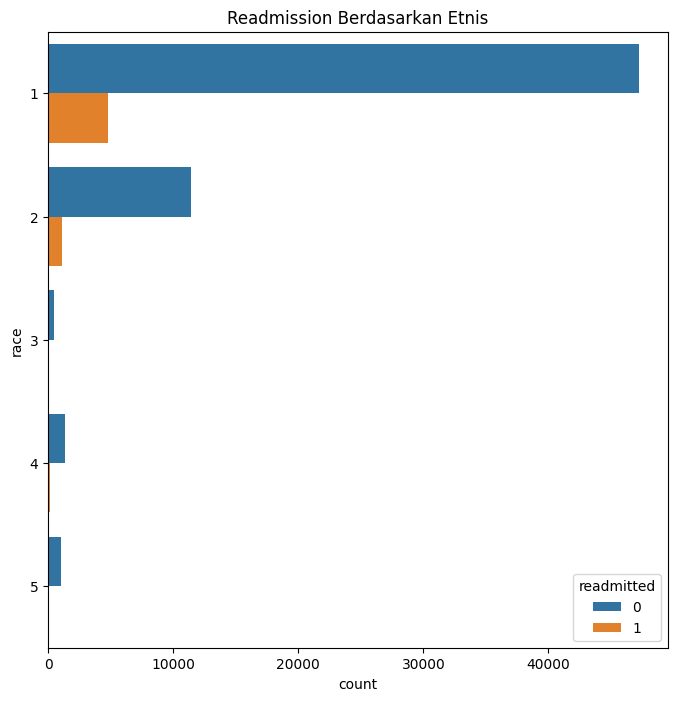

In [34]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = clean_df['race'], hue = clean_df['readmitted']).set_title('Readmission Berdasarkan Etnis')

**Jumlah Pengobatan yang Digunakan vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Jumlah Pengobatan yang Digunakan')

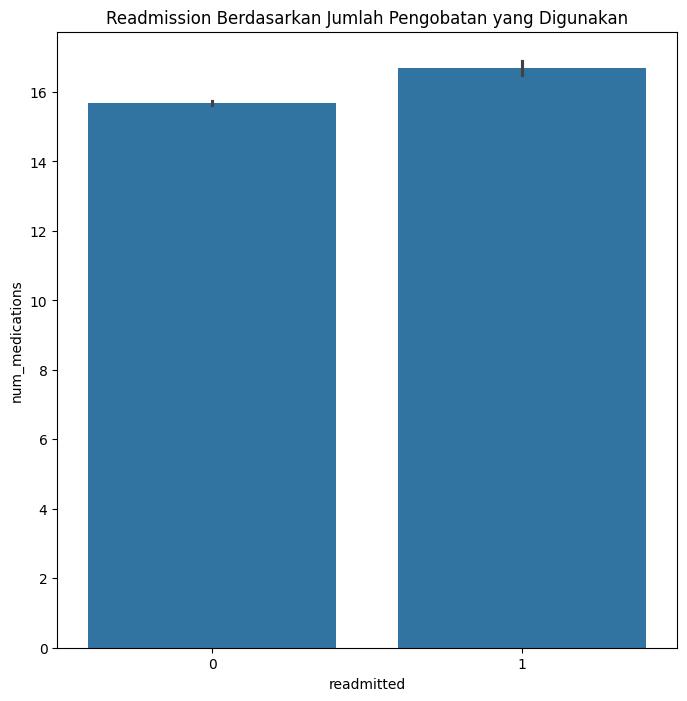

In [35]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = clean_df['readmitted'], y = clean_df['num_medications']).set_title("Readmission Berdasarkan Jumlah Pengobatan yang Digunakan")

**Pertukaran Pengobatan vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Jumlah Pertukaran Pengobatan')

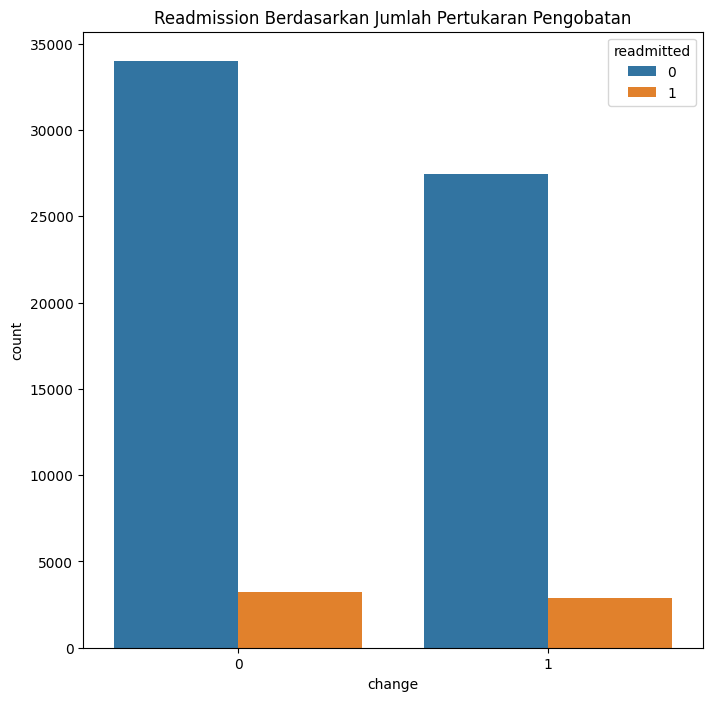

In [36]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = clean_df['change'], hue = clean_df['readmitted']).set_title('Readmission Berdasarkan Jumlah Pertukaran Pengobatan')

**Pengobatan Diabetes vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Pengobatan Diabetes')

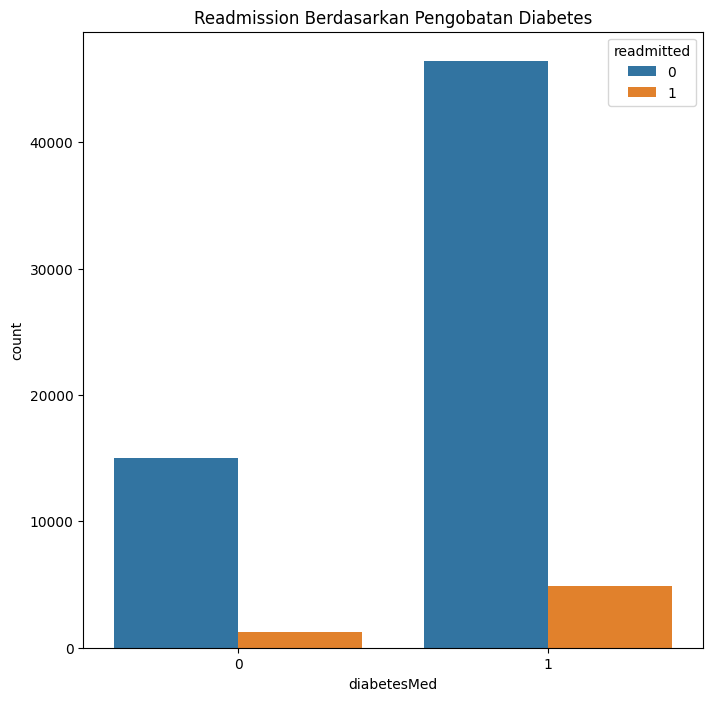

In [37]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = clean_df['diabetesMed'], hue = clean_df['readmitted']).set_title('Readmission Berdasarkan Pengobatan Diabetes')

**Total Kunjungan vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Total Kunjungan')

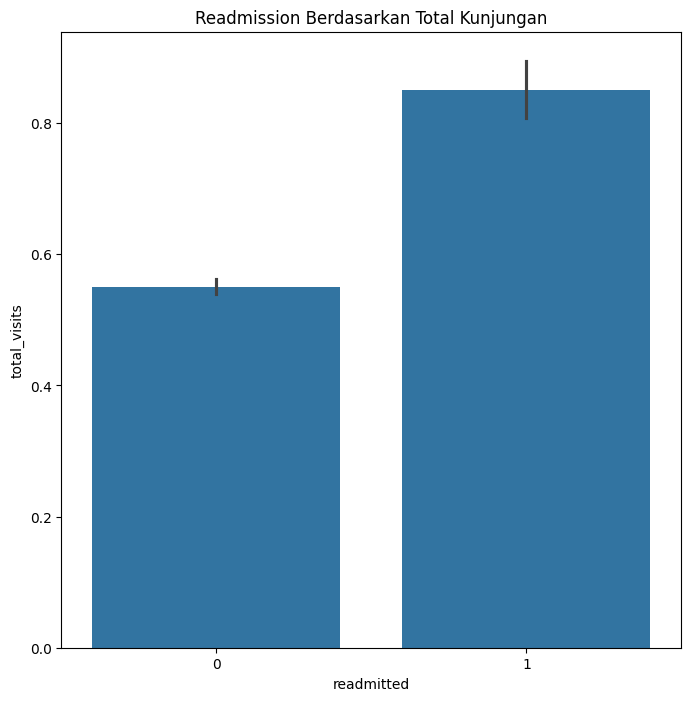

In [38]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = clean_df['total_visits'], x = clean_df['readmitted']).set_title('Readmission Berdasarkan Total Kunjungan')

**Hasil Tes Serum Glukosa vs Readmission**

Tes Glukosa Serum - Tes glukosa darah digunakan untuk mengetahui apakah kadar gula darah Anda berada dalam kisaran yang sehat. Tes ini sering digunakan untuk membantu mendiagnosis dan memantau diabetes.

- '>200' : 1 = menunjukkan diabetes
- '>300' : 1 = menunjukkan diabetes
- 'Norm' : 0 = Normal
- 'None' : -99 = tes tidak dilakukan

Text(0.5, 1.0, 'Readmission Berdasarkan Hasil Tes Serum Glukosa')

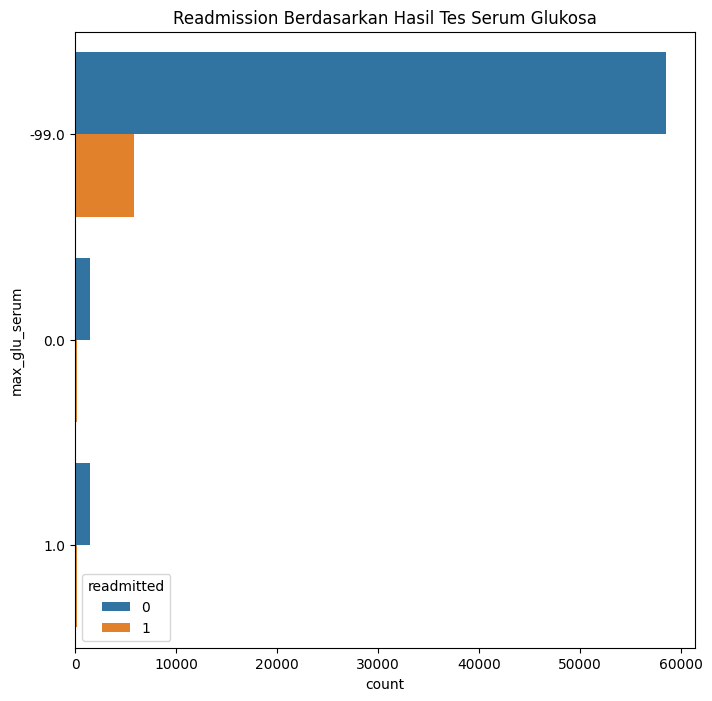

In [39]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = clean_df['max_glu_serum'], hue = clean_df['readmitted']).set_title('Readmission Berdasarkan Hasil Tes Serum Glukosa')

**Hasil A1C vs Readmission**

Tes A1C adalah tes darah yang memberikan informasi tentang kadar glukosa darah rata-rata Anda, yang juga disebut gula darah, selama 3 bulan terakhir.

- '>7' : 1
- '>8' : 1
- Norm : 0 = Normal
- None : -99 = Tes tidak dilakukan

Text(0.5, 1.0, 'Readmission Berdasarkan Hasil Tes A1C')

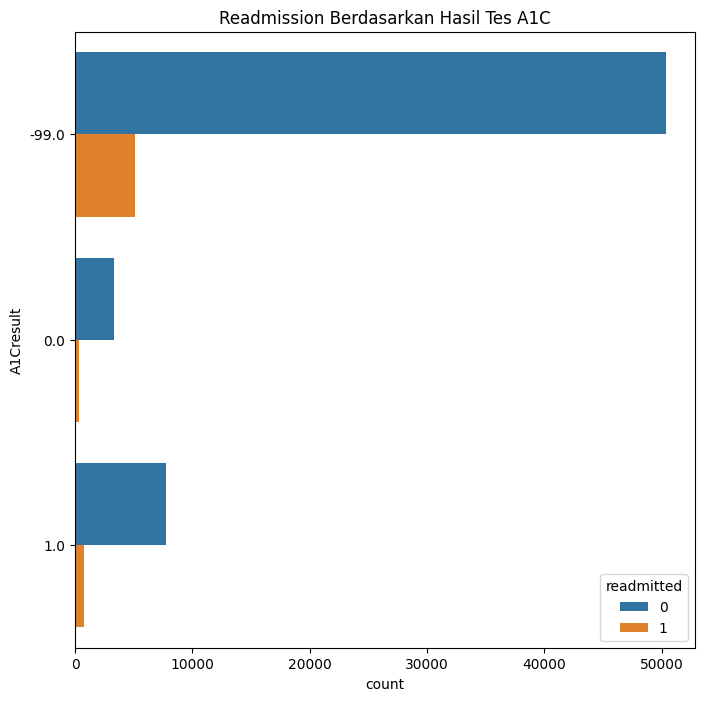

In [40]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= clean_df['A1Cresult'], hue = clean_df['readmitted']).set_title('Readmission Berdasarkan Hasil Tes A1C')

**Jumlah Prosedur Lab vs Readmission**

Text(0.5, 1.0, 'Readmission Berdasarkan Jumlah Prosedur Lab')

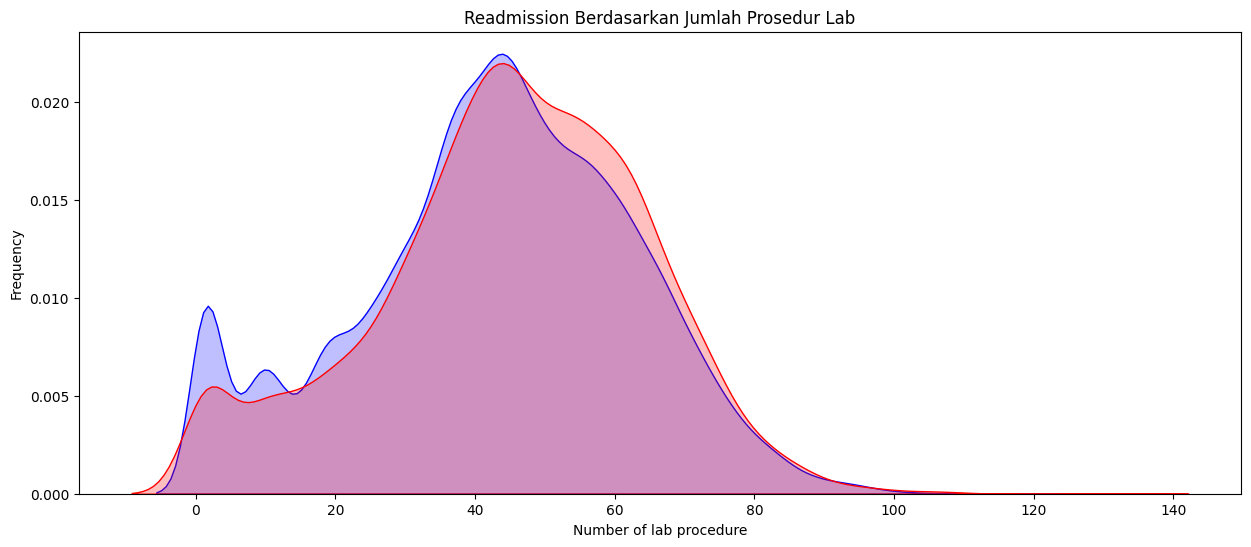

In [41]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(clean_df.loc[(clean_df['readmitted'] == 0),'num_lab_procedures'] , color='b',fill=True,label='Not readmitted')
ax=sns.kdeplot(clean_df.loc[(clean_df['readmitted'] == 1),'num_lab_procedures'] , color='r',fill=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Readmission Berdasarkan Jumlah Prosedur Lab')

Text(0.5, 1.0, 'Distribusi Jumlah Prosedur Lab Berdasarkan Readmission')

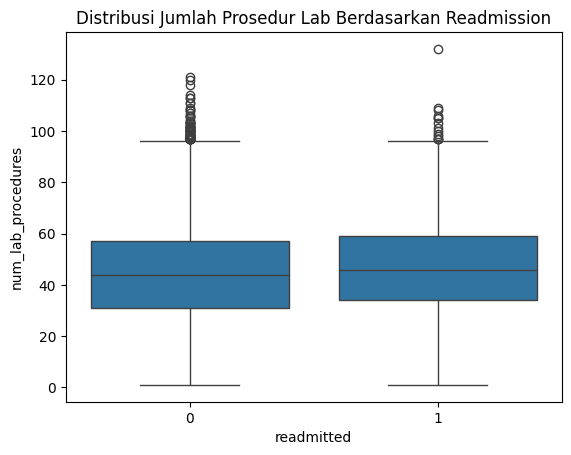

In [42]:
sns.boxplot(x='readmitted', y='num_lab_procedures', data=clean_df)
plt.title("Distribusi Jumlah Prosedur Lab Berdasarkan Readmission")

## Step 5: Data Postprocessing

In [43]:
# Exclude IDs and already categorical features
num_col = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_col = list(set(num_col) - {'encounter_id', 'patient_nbr', 'readmitted'})

print("Numeric columns for statdataframe analysis:")
print(num_col)

Numeric columns for statdataframe analysis:
['glimepiride', 'age', 'change_diabetesMed', 'nateglinide', 'discharge_disposition_id', 'glipizide-metformin', 'group_diag_2_encoded', 'insulin', 'admission_source_id', 'tolazamide', 'metformin-pioglitazone', 'number_outpatient', 'glyburide', 'time_in_hospital', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'total_visits', 'max_glu_serum', 'numchange', 'acarbose', 'repaglinide', 'gender', 'acetohexamide', 'tolbutamide', 'glipizide', 'change', 'group_diag_1_encoded', 'metformin', 'race', 'number_emergency', 'number_inpatient', 'num_procedures', 'rosiglitazone', 'high_utilization', 'A1Cresult', 'pioglitazone', 'glyburide-metformin', 'outpatient_to_inpatient', 'troglitazone', 'group_diag_3_encoded', 'num_medications', 'number_diagnoses', 'chlorpropamide', 'admission_type_id', 'num_lab_procedures', 'diabetesMed', 'emergency_to_inpatient', 'miglitol']


In [44]:
# Apply Yeo-Johnson transformation (works for positive and negative values)
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
df_transformed[num_col] = pt.fit_transform(df[num_col])

print("Power-transformed numeric features:")
print(df_transformed.head())

Power-transformed numeric features:
   encounter_id  patient_nbr      race    gender       age  admission_type_id  \
1        149190     55629189 -0.546772 -0.935405 -2.495473          -0.931581   
2         64410     86047875  1.804321 -0.935405 -2.198959          -0.931581   
3        500364     82442376 -0.546772  1.069056 -1.808184          -0.931581   
4         16680     42519267 -0.546772  1.069056 -1.331951          -0.931581   
5         35754     82637451 -0.546772  1.069056 -0.776279           0.456080   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                  -0.75319             0.513291         -0.237585   
2                  -0.75319             0.513291         -0.795307   
3                  -0.75319             0.513291         -0.795307   
4                  -0.75319             0.513291         -1.611879   
5                  -0.75319            -0.869531         -0.237585   

   num_lab_procedures  ...  group_diag_2                

In [45]:
# # Data Preprocessing (before feature importance)
# X = clean_df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])  # Drop target and IDs
# y = clean_df['readmitted']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Train and Test sets created:")
# print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

In [46]:
# # Scale the data using StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on training data and transform both train and test
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# print("Data has been scaled using StandardScaler.")

In [47]:
# # Train Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_scaled, y_train)

# # Get feature importance
# importances = rf_model.feature_importances_
# feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# print("Random Forest Feature Importance:")
# print(feature_importance_rf)

In [48]:
# # Plot Feature Importances
# feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importance")

In [49]:
# # Train Lasso model for feature importance
# lasso = Lasso(alpha=0.01)  # Regularization strength
# lasso.fit(X_train_scaled, y_train)

# # Get feature importance (Lasso coefficients)
# feature_importance_lasso = pd.DataFrame({'Feature': X.columns, 'Importance': lasso.coef_})
# feature_importance_lasso = feature_importance_lasso[feature_importance_lasso['Importance'] != 0]
# feature_importance_lasso = feature_importance_lasso.sort_values(by='Importance', ascending=False)

# print("Lasso Feature Importance (Non-zero Coefficients):")
# print(feature_importance_lasso)

In [50]:
# selected_features = list(set(feature_importance_rf['Feature'].head(10)) | set(feature_importance_lasso['Feature']))
# print("Final Selected Features:")

# for i, feature in enumerate(selected_features):
#     print(f"{i+1}. {feature}")

In [51]:
# # Define function to calculate VIF
# def calculate_vif(X):
#     vif = pd.DataFrame()
#     vif['Feature'] = X.columns
#     vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif.sort_values(by="VIF", ascending=False)

# X_selected = clean_df[selected_features]

# # Iteratively drop high VIF features
# while True:
#     vif_scores = calculate_vif(X_selected)
#     print(vif_scores)

#     # Check if the highest VIF is greater than 10
#     if vif_scores['VIF'].iloc[0] > 10:
#         feature_to_drop = vif_scores['Feature'].iloc[0]
#         print(f"Dropping feature: {feature_to_drop}")
#         X_selected = X_selected.drop(columns=[feature_to_drop])
#     else:
#         break

# print("Final Selected Features after VIF correction:")
# print(X_selected.columns)

## Step 6: Model Development

In [52]:
X = clean_df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])  # Drop target and IDs
y = clean_df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pertama, karena EDA readmission menunjukkan data imbalance, kita lakukan teknik SMOTE untuk menduplikasi data secara sintetis. Data yang diduplikasi hanya digunakan untuk data training pada kondisi permodelan seperti logistic regression. Untuk pohon kita tidak menggunakan SMOTE.

In [53]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution after SMOTE:
readmitted
0    49181
1    49181
Name: count, dtype: int64


In [54]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled_smote = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")

Data scaling completed.


### 1. Logistic Regression

In [55]:
lr = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear', random_state=42)
lr.fit(X_train_scaled_smote, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [56]:
lr_pred = lr.predict(X_test_scaled)

In [57]:
# Confusion Matrix
conf_matrix_lr = pd.crosstab(pd.Series(y_test, name='Actual'),
                          pd.Series(lr_pred, name='Predict'),
                          margins=True)
print("Confusion Matrix Logistic Regression:\n")
print(conf_matrix_lr)

Confusion Matrix Logistic Regression:

Predict     0    1   All
Actual                  
0        1405  403  1808
1         157   50   207
All      1562  453  2015


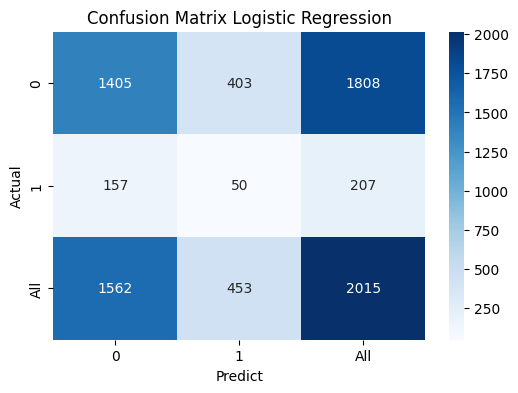

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.show()

In [59]:
# Accuracy, Precision, Recall
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

print("Accuracy: {:.2f}".format(accuracy_lr))
print("Precision: {:.2f}".format(precision_lr))
print("Recall: {:.2f}".format(recall_lr))
print("F1 Score: {:.2f}".format(f1_lr))

Accuracy: 0.73
Precision: 0.10
Recall: 0.24
F1 Score: 0.14


### 2. Decision Tree

Ketika menggunakan data yang tidak di SMOTE, kita akan melakukan standardisasi ulang untuk digunakan oleh model lainnya.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")

Data scaling completed.


In [62]:
dt = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [63]:
dt_pred = dt.predict(X_test_scaled)

In [64]:
# Confusion Matrix
conf_matrix_dt = pd.crosstab(pd.Series(y_test, name='Actual'),
                          pd.Series(dt_pred, name='Predict'),
                          margins=True)
print("Confusion Matrix Decision Tree:\n")
print(conf_matrix_dt)

Confusion Matrix Decision Tree:

Predict     0    1   All
Actual                  
0        1680  128  1808
1         188   19   207
All      1868  147  2015


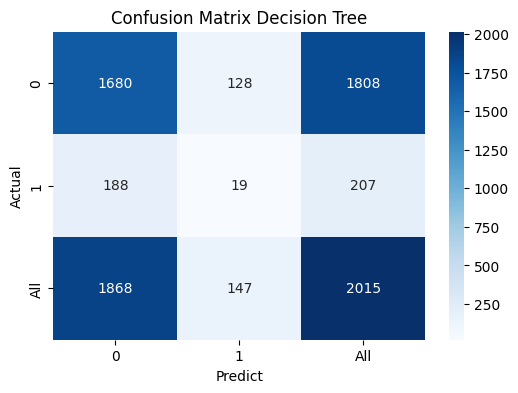

In [65]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Decision Tree")
plt.show()

In [66]:
# Accuracy, Precision, Recall
accuracy_dt = accuracy_score(y_test, dt_pred)
precision_dt = precision_score(y_test, dt_pred)
recall_dt = recall_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred)

print("Accuracy: {:.2f}".format(accuracy_dt))
print("Precision: {:.2f}".format(precision_dt))
print("Recall: {:.2f}".format(recall_dt))
print("F1 Score: {:.2f}".format(f1_dt))

Accuracy: 0.85
Precision: 0.13
Recall: 0.11
F1 Score: 0.12


### 3. Random Forest

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")

Data scaling completed.


In [69]:
rf = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [70]:
rf_pred = rf.predict(X_test_scaled)

In [71]:
# Confusion Matrix
conf_matrix_rf = pd.crosstab(pd.Series(y_test, name='Actual'),
                          pd.Series(rf_pred, name='Predict'),
                          margins=True)
print("Confusion Matrix Random Forest:\n")
print(conf_matrix_rf)

Confusion Matrix Random Forest:

Predict     0  1   All
Actual                
0        1804  4  1808
1         207  0   207
All      2011  4  2015


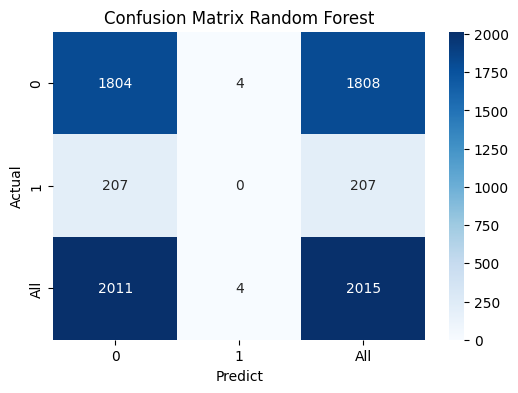

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.show()

In [74]:
# Accuracy, Precision, Recall
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)

print("Accuracy: {:.2f}".format(accuracy_rf))
print("Precision: {:.2f}".format(precision_rf))
print("Recall: {:.2f}".format(recall_rf))
print("F1 Score: {:.2f}".format(f1_rf))

Accuracy: 0.91
Precision: 0.50
Recall: 0.01
F1 Score: 0.01


Untuk dapat menjawab pertanyaan pertama, dapat kita lakukan dengan mencari feature importance

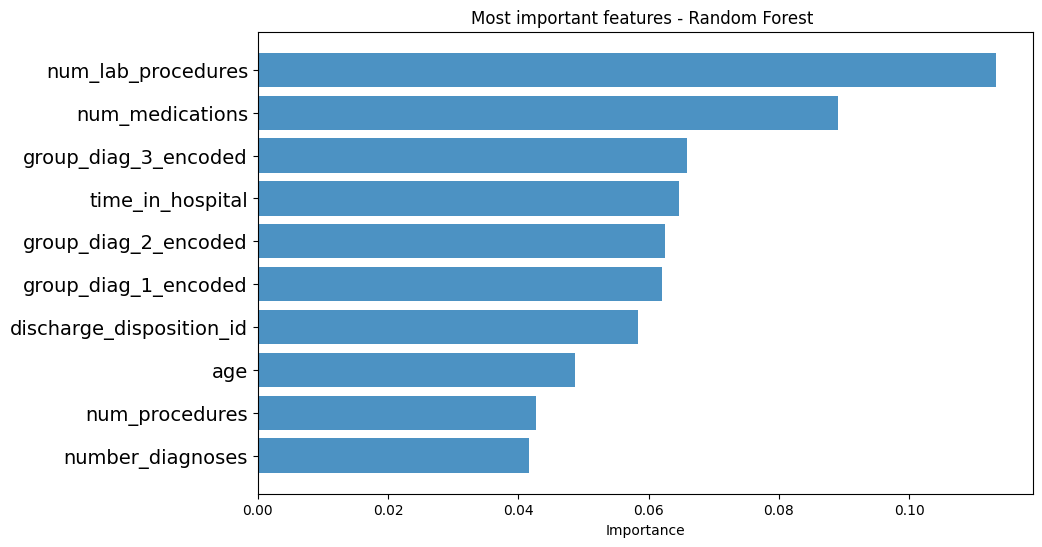

In [75]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

### 4. Neural Network

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution after SMOTE:
readmitted
0    49181
1    49181
Name: count, dtype: int64


In [78]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")

Data scaling completed.


In [79]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input Layer
    Dropout(0.3),
    Dense(64, activation='relu'),  # Hidden Layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output Layer (Sigmoid for binary classification)
])

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = ann_model.fit(X_train_scaled_smote, y_train_balanced,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7332 - loss: 0.5237 - val_accuracy: 0.8107 - val_loss: 0.4698
Epoch 2/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7998 - loss: 0.4215 - val_accuracy: 0.8116 - val_loss: 0.4668
Epoch 3/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8058 - loss: 0.4079 - val_accuracy: 0.8210 - val_loss: 0.4550
Epoch 4/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8079 - loss: 0.4018 - val_accuracy: 0.8118 - val_loss: 0.4524
Epoch 5/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8166 - loss: 0.3905 - val_accuracy: 0.8244 - val_loss: 0.4397
Epoch 6/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8183 - loss: 0.3886 - val_accuracy: 0.8150 - val_loss: 0.4440
Epoch 7/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8194 - loss: 0.3846 - val_accuracy: 0.8155 - val_loss: 0.4545
Epoch 8/50
3074/3074 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8224 - loss: 0.38

In [84]:
ann_pred_prob = ann_model.predict(X_test_scaled).flatten()
ann_pred = np.where(nn_pred_prob > 0.5, 1, 0)

423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


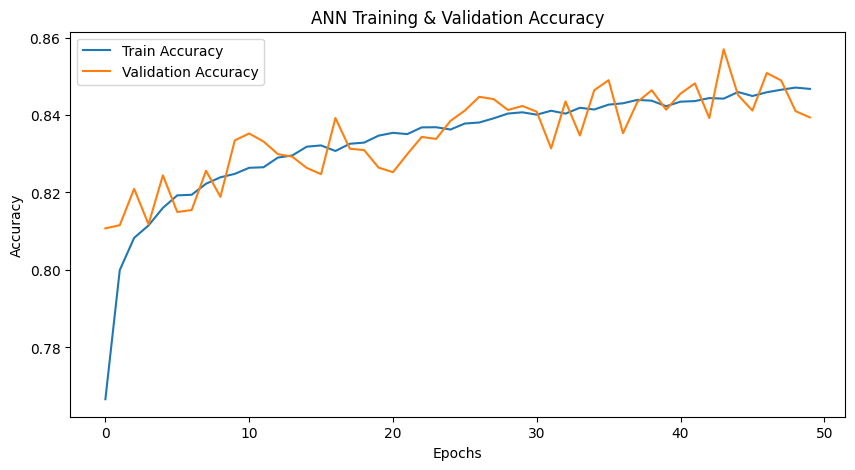

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
conf_matrix_ann = pd.crosstab(pd.Series(y_test, name='Actual'),
                          pd.Series(ann_pred, name='Predict'),
                          margins=True)
print("Confusion Matrix Neural Network:\n")
print(conf_matrix_ann)

Confusion Matrix Neural Network:

Predict     0    1   All
Actual                  
0        1655  153  1808
1         184   23   207
All      1839  176  2015


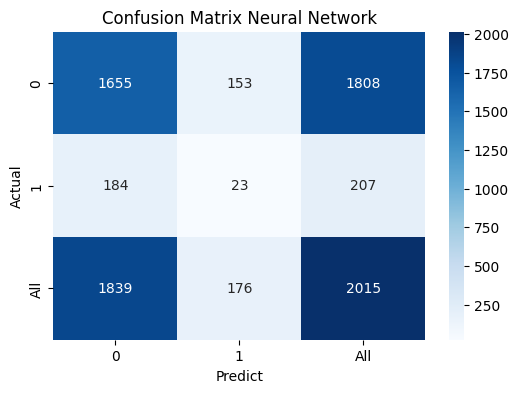

In [87]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Neural Network")
plt.show()

In [88]:
# Accuracy, Precision, Recall
accuracy_ann = accuracy_score(y_test, ann_pred)
precision_ann = precision_score(y_test, ann_pred)
recall_ann = recall_score(y_test, ann_pred)
f1_ann = f1_score(y_test, ann_pred)

print("Accuracy: {:.2f}".format(accuracy_ann))
print("Precision: {:.2f}".format(precision_ann))
print("Recall: {:.2f}".format(recall_ann))
print("F1 Score: {:.2f}".format(f1_ann))

Accuracy: 0.84
Precision: 0.10
Recall: 0.10
F1 Score: 0.10


## Step 7: Model Evaluation

In [89]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, is_ann=False):
    if is_ann:
        y_pred_prob = model.predict(X_test).flatten()
        y_pred = np.where(y_pred_prob > 0.5, 1, 0)
    else:
        y_pred = model.predict(X_test)

    # Print Metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    return y_pred

In [90]:
# Logistic Regression
print("Logistic Regression Results:")
lr_pred = evaluate_model(lr, X_test_scaled, y_test)

# Decision Tree
print("Decision Tree Results:")
dt_pred = evaluate_model(dt, X_test_scaled, y_test)

# Random Forest
print("Random Forest Results:")
rf_pred = evaluate_model(rf, X_test_scaled, y_test)

# ANN
print("ANN Results:")
ann_pred = evaluate_model(ann_model, X_test_scaled, y_test, is_ann=True)

Logistic Regression Results:
Accuracy: 0.7346108316069843
Precision: 0.10146407899216887
Recall: 0.2391653290529695
F1 Score: 0.142481472627301

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     12270
           1       0.10      0.24      0.14      1246

    accuracy                           0.73     13516
   macro avg       0.51      0.51      0.49     13516
weighted avg       0.84      0.73      0.78     13516

--------------------------------------------------
Decision Tree Results:
Accuracy: 0.8523971589227582
Precision: 0.1190233977619532
Recall: 0.09390048154093097
F1 Score: 0.10497981157469717

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12270
           1       0.12      0.09      0.10      1246

    accuracy                           0.85     13516
   macro avg       0.51      0.51      0.51     13516
weighted avg      

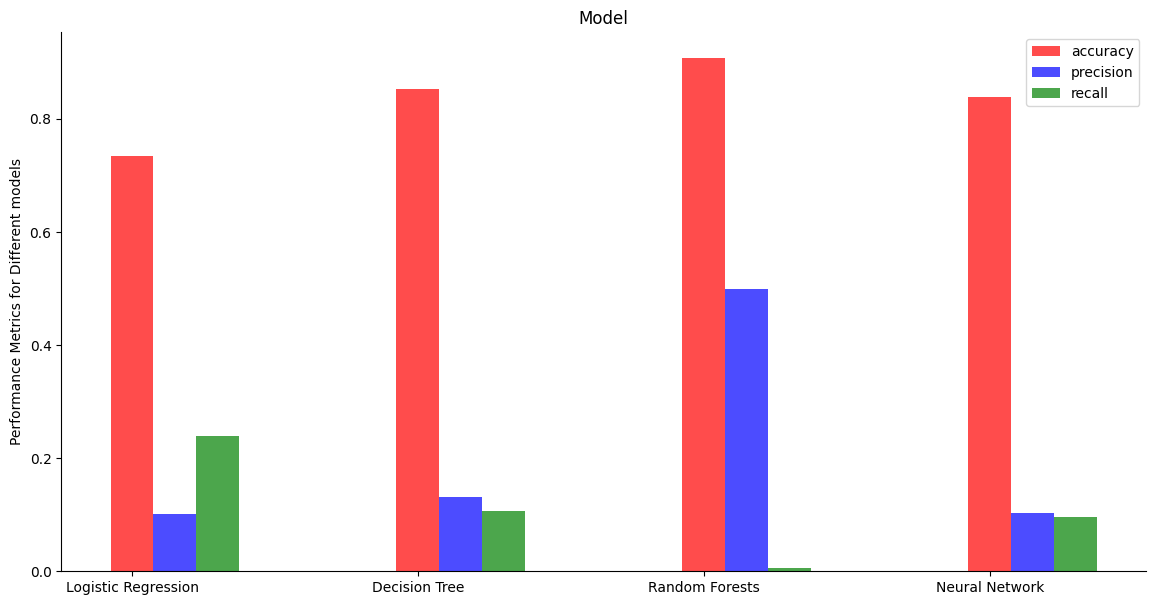

In [91]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Neural Network']
values = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_ann]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Neural Network']
values = [precision_lr, precision_dt, precision_rf, precision_ann]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Neural Network']
values = [recall_lr, recall_dt, recall_rf, recall_ann]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')

# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

## Step 8: Model Prediction

In [93]:
# Combine predictions into a single DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Regression': lr_pred,
    'Decision_Tree': dt_pred,
    'Random_Forest': rf_pred,
    'ANN': ann_pred
})

print("Model Predictions:")
print(results_df.head(20))

Model Predictions:
       Actual  Logistic_Regression  Decision_Tree  Random_Forest  ANN
29371       0                    0              0              0    0
57587       0                    0              0              0    0
58124       0                    0              0              0    0
30918       0                    1              0              0    1
68945       0                    0              0              0    0
10041       1                    0              0              0    0
30910       0                    0              0              0    0
11989       0                    0              0              0    0
90547       0                    0              0              0    0
43590       0                    0              0              0    0
39748       0                    0              0              0    0
33740       0                    1              0              0    0
71580       1                    0              0              0    0
6